# WeatherPy
## Andrea Monnerie
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather = requests.get(city_url).json()['weather']
        city_lat = requests.get(city_url).json()['coord']['lat']
        city_lng = requests.get(city_url).json()['coord']['lon']
        city_max_temp = requests.get(city_url).json()['main']['temp_max']
        city_humidity = requests.get(city_url).json()['main']['humidity']
        city_clouds = requests.get(city_url).json()['clouds']['all']
        city_wind = requests.get(city_url).json()['wind']['speed']
        city_country = requests.get(city_url).json()['sys']['country']
        city_date = requests.get(city_url).json()['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leava
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | holualoa
Processing Record 5 of Set 1 | bamusso
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | smithers
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | tofol
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | saint croix
Processing Record 18 of Set 1 | muromtsevo
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | destin
Processing Record 21 of Set 1 | kudahuvadhoo
Processing Record 22 of Set 1 | grytviken
Proces

City not found. Skipping...
Processing Record 38 of Set 4 | kruisfontein
Processing Record 39 of Set 4 | kirensk
Processing Record 40 of Set 4 | lihue
Processing Record 41 of Set 4 | bhimunipatnam
Processing Record 42 of Set 4 | mizdah
Processing Record 43 of Set 4 | papatowai
Processing Record 44 of Set 4 | bossangoa
Processing Record 45 of Set 4 | ulladulla
Processing Record 46 of Set 4 | cradock
Processing Record 47 of Set 4 | general roca
Processing Record 48 of Set 4 | hadibu
Processing Record 49 of Set 4 | dunedin
Processing Record 0 of Set 5 | alaghsas
Processing Record 1 of Set 5 | costa calma
City not found. Skipping...
Processing Record 2 of Set 5 | bria
Processing Record 3 of Set 5 | prince george
Processing Record 4 of Set 5 | udachny
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | fallon
Processing Record 7 of Set 5 | newport beach
Processing Record 8 of Set 5 | anloga
Processing Record 9 of Set 5 | tucurui
Processing Record 10 of Set 5 | xunchang
Proces

Processing Record 29 of Set 8 | brookings
Processing Record 30 of Set 8 | vallenar
Processing Record 31 of Set 8 | wynyard
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | harper
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | busayra
Processing Record 36 of Set 8 | tyuratam
Processing Record 37 of Set 8 | prince rupert
Processing Record 38 of Set 8 | saldanha
Processing Record 39 of Set 8 | bodo
Processing Record 40 of Set 8 | tanumah
Processing Record 41 of Set 8 | vianopolis
Processing Record 42 of Set 8 | horta
Processing Record 43 of Set 8 | aral
Processing Record 44 of Set 8 | nyrob
Processing Record 45 of Set 8 | wad az zaki
Processing Record 46 of Set 8 | nyagan
Processing Record 47 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 48 of Set 8 | ha tinh
Processing Record 49 of Set 8 | pisco
Processing Record 0 of Set 9 | afif
Processing Record 1 of Set 9 | kuytun
Processing Record 2 of Set 9 | fortuna
Pro

Processing Record 19 of Set 12 | kimbe
Processing Record 20 of Set 12 | arica
Processing Record 21 of Set 12 | mwene-ditu
Processing Record 22 of Set 12 | fulton
Processing Record 23 of Set 12 | whyalla norrie
City not found. Skipping...
Processing Record 24 of Set 12 | sassandra
Processing Record 25 of Set 12 | shobara
Processing Record 26 of Set 12 | nenjiang
Processing Record 27 of Set 12 | souillac
Processing Record 28 of Set 12 | sidney
Processing Record 29 of Set 12 | dakhla
Processing Record 30 of Set 12 | negara
Processing Record 31 of Set 12 | kabansk
Processing Record 32 of Set 12 | sydney
Processing Record 33 of Set 12 | toga village
City not found. Skipping...
Processing Record 34 of Set 12 | kodinar
Processing Record 35 of Set 12 | brokopondo
Processing Record 36 of Set 12 | naze
Processing Record 37 of Set 12 | aswan
Processing Record 38 of Set 12 | san miguel
Processing Record 39 of Set 12 | fort-shevchenko
Processing Record 40 of Set 12 | santana
Processing Record 41 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,leava,-14.3000,-178.1667,28.19,77,10,3.00,WF,1683586622
1,edinburgh of the seven seas,-37.0676,-12.3116,15.50,69,100,5.53,SH,1683586512
2,port-aux-francais,-49.3500,70.2167,6.09,96,100,20.62,TF,1683586495
3,holualoa,19.6228,-155.9522,26.91,77,40,5.14,US,1683586630
4,bamusso,4.4591,8.9027,26.36,87,28,1.70,CM,1683586633


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leava,-14.3000,-178.1667,28.19,77,10,3.00,WF,1683586622
1,edinburgh of the seven seas,-37.0676,-12.3116,15.50,69,100,5.53,SH,1683586512
2,port-aux-francais,-49.3500,70.2167,6.09,96,100,20.62,TF,1683586495
3,holualoa,19.6228,-155.9522,26.91,77,40,5.14,US,1683586630
4,bamusso,4.4591,8.9027,26.36,87,28,1.70,CM,1683586633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

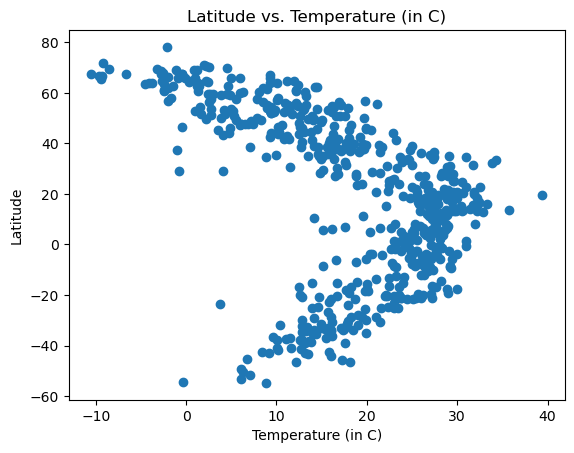

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (in C)")
plt.xlabel("Temperature (in C)")
plt.ylabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

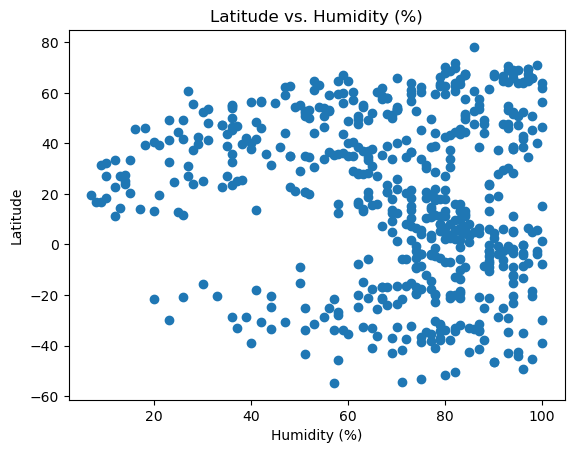

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

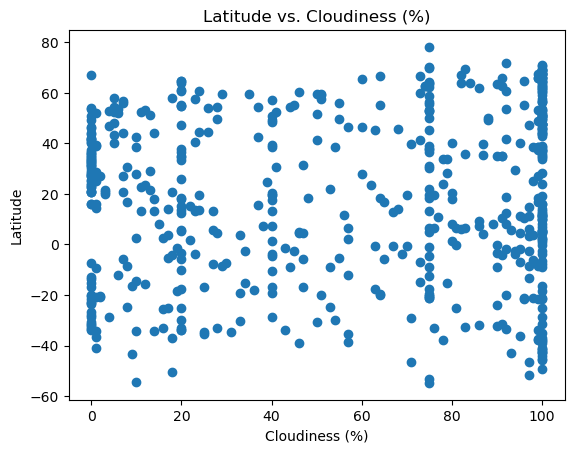

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

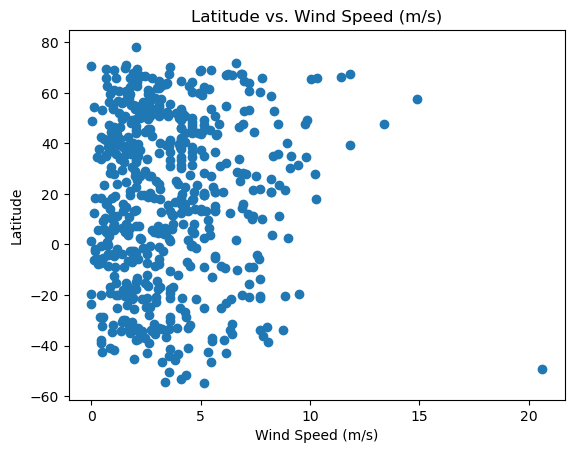

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (m/s)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regressionPlot(df_x, df_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df_x, df_y)
    print(f"The r-value is: {rvalue}")
    plt.plot(df_x, slope*df_x+intercept, color='red')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] > 0) | (city_data_df['Lat'] == 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,holualoa,19.6228,-155.9522,26.91,77,40,5.14,US,1683586630
4,bamusso,4.4591,8.9027,26.36,87,28,1.70,CM,1683586633
5,talnakh,69.4865,88.3972,-3.27,97,100,0.66,RU,1683586503
6,dudinka,69.4058,86.1778,-8.51,97,83,2.08,RU,1683586640
7,smithers,54.7804,-127.1743,16.18,36,20,6.17,CA,1683586643


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leava,-14.3000,-178.1667,28.19,77,10,3.00,WF,1683586622
1,edinburgh of the seven seas,-37.0676,-12.3116,15.50,69,100,5.53,SH,1683586512
2,port-aux-francais,-49.3500,70.2167,6.09,96,100,20.62,TF,1683586495
8,bredasdorp,-34.5322,20.0403,12.85,93,25,0.97,ZA,1683586645
9,ushuaia,-54.8000,-68.3000,8.81,57,75,5.14,AR,1683586557


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8394177138887643


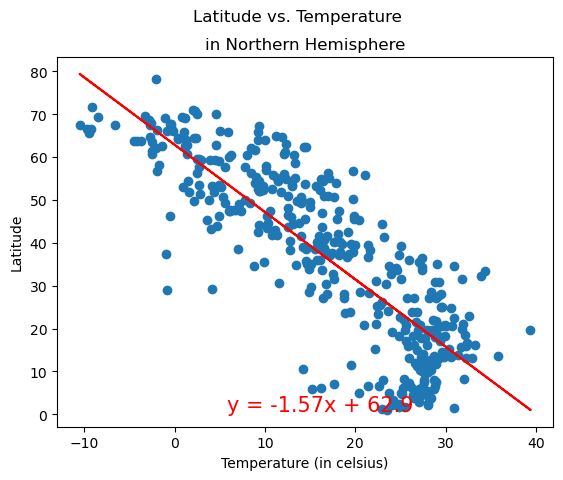

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])
regressionPlot(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Temperature (in C)")
plt.title("in Northern Hemisphere")
plt.xlabel("Temperature (in C)")
plt.ylabel("Latitude")
plt.show()

The r-value is: 0.80155846421086


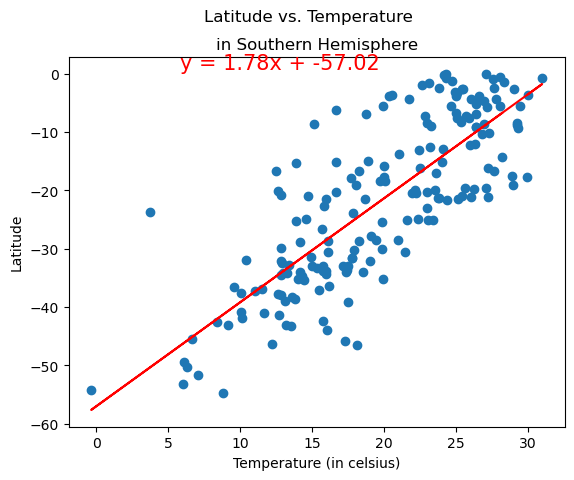

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
regressionPlot(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Temperature (in C)")
plt.title("in Southern Hemisphere")
plt.xlabel("Temperature (in C)")
plt.ylabel("Latitude")
plt.show()

**Discussion about the linear relationship:** The relationship is directly linear. The spread is wider for the southern hemisphere compare to the northen hemisphere, but follows the relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04228847976777079


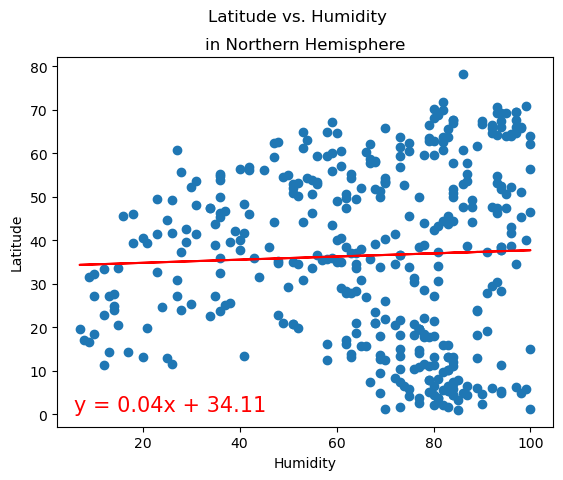

In [18]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])
regressionPlot(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Humidity (%)")
plt.title("in Northern Hemisphere (%)")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

The r-value is: 0.21276661055346596


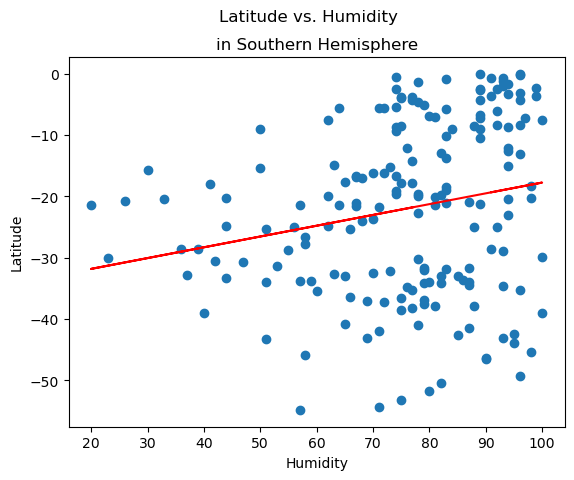

In [19]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])
regressionPlot(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Humidity (%)")
plt.title("in Southern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.show()

**Discussion about the linear relationship:** The relationship is weak for both hemispheres. Interestly, the linear equations are similar to each other.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1204425819102043


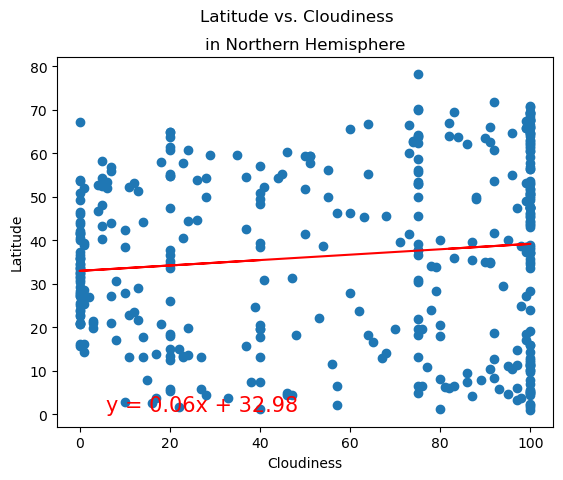

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])
regressionPlot(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Cloudiness (%)")
plt.title("in Northern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.show()

The r-value is: -0.033824830527134406


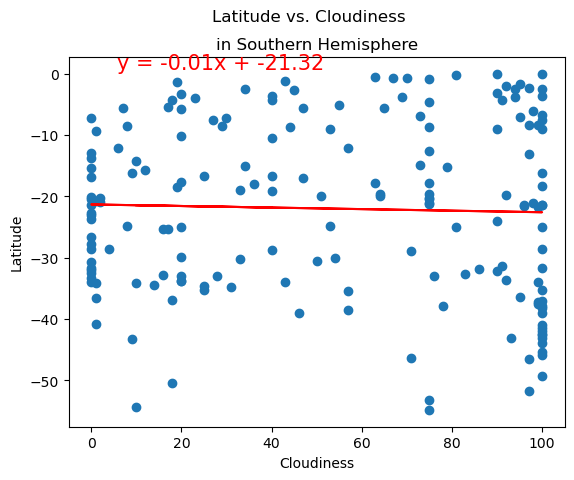

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])
regressionPlot(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Cloudiness (%)")
plt.title("in Southern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.show()

**Discussion about the linear relationship:** The relationship is very weak, nearly no relationship. The spread is too great to have a clear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02086695747035559


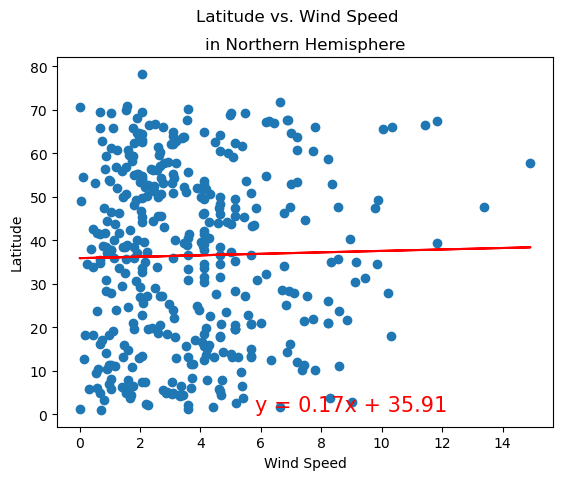

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])
regressionPlot(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Wind Speed (m/s)")
plt.title("in Northern Hemisphere")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.show()

The r-value is: -0.1998814150209184


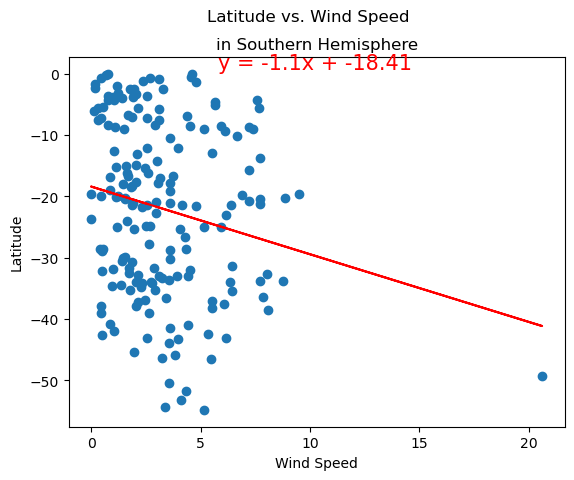

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])
regressionPlot(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])
plt.suptitle("Latitude vs. Wind Speed (m/s)")
plt.title("in Southern Hemisphere")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.show()

**Discussion about the linear relationship:** The relationship is very weak just like the previous graphs. The spread is too great to have a clear relationship. However the southern hemisphere has a better relationship.